<a href="https://colab.research.google.com/github/Prog19/text_topic_modeling/blob/master/text_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tomodapi
!pip install gensim
!pip install pyLDAvis
!pip install pyLDAvis.gensim
from IPython.display import clear_output
clear_output()

In [ ]:
import nltk
nltk.download('omw-1.4')

## Topic Models

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
#print(os.getcwd())
#print(os.path.exists("/content/drive/MyDrive/Colab Notebooks/Topic_Model/models/lda/lda.pkl")
os.chdir("./drive/MyDrive/Colab Notebooks/Topic Model") #run it once & comment
#print(os.listdir("."))

TRAIN_CORPUS = "./data/train_medium_size_corpus.txt"
TEST_CORPUS = "./data/test.txt"
TEST_LABELS = './data/test_labels.txt'
TEST_SENTENCE = "In the time since the industrial revolution the climate has increasingly been affected by human activities that are causing global warming and climate change."

In [ ]:
def run_model(mod):
    m = mod() # if the model_path arguement is not specified, the library will load the model from models/<model_name>
    m.train(TEST_CORPUS, preprocessing=False, num_topics=10)
    '''
    print("TRAINING:")    
    # get predictions computed on the training corpus
    for i, p in enumerate(m.get_corpus_predictions(topn=3)): # for each document
        print(f'Predictions on document {i}')
        for topic, confidence in p:
            print(f'- Topic {topic} with confidence {confidence}')

    # get coherence against the training corpus
    print(f"\n {m.coherence(TEST_CORPUS, metric='c_v')}\n")

    # get topics
    for i, x in enumerate(m.topics):
        print(f'Topic {i}')
        for word, weight in zip(x['words'], x['weights']):
            print(f'- {word} => {weight}')
    '''
    print('\nEVALUATION:')
    with open(TEST_LABELS, 'r') as f:
        labels = [x.strip() for x in f.readlines()]
    res = m.get_corpus_predictions(topn=1)
    for metric in ['purity', 'homogeneity', 'completeness', 'v-measure', 'nmi']:
      e = m.evaluate(res, labels, metric=metric)
      print(f'- {metric} {e}')

    print("\nPREDICTION:")
    # infer topic of a sentence
    pred = m.predict(TEST_SENTENCE, topn=3)
    for topic, confidence in pred:
        print(f'- Topic {topic} with confidence {confidence}')
        
    # get top words for a given topic
    topic,confidence = pred[0]
    print(f'\n- Topic {topic} -> {m.topic(topic)}')

In [ ]:
#help('tomodapi')
import tomodapi as models
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

for mod in models.__all__:
  if all(x not in str(mod) for x in ["LftmModel","Doc2TopicModel","PvtmModel","HDPModel"]):
    print(f'\n\n{mod}')
    try:
      run_model(mod)
    except Exception as e: 
      print(e)
      pass



<class 'tomodapi.gsdmm_model.GsdmmModel'>

EVALUATION:
- purity 0.43333333333333335
- homogeneity 0.5101910142831895
- completeness 0.7559621722734114
- v-measure 0.6092234518333358
- nmi 0.6092234518333357

PREDICTION:
- Topic 2 with confidence 0.8093826009592986
- Topic 8 with confidence 0.07541667713787112
- Topic 6 with confidence 0.029543933621990544

- Topic 2 -> {'words': ['window', 'thanks', 'file', 'terminal', 'ncd', 'font', 'boot', 'tcp', 'access', 'control'], 'weights': [0.03773584905660377, 0.025157232704402517, 0.025157232704402517, 0.025157232704402517, 0.025157232704402517, 0.025157232704402517, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886, 0.018867924528301886]}


<class 'tomodapi.lda_model.LdaModel'>

EVALUATION:
- purity 0.4
- homogeneity 0.5842382283589069
- completeness 0.7200836528400548
- v-measure 0.6450867744682266
- nmi 0.6450867744682266

PREDICTION:
- Topic 6 with confidence 0.8589680550600391
- Topic 9 with confidence 0.1101977161689467

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: [100/100]	 Seen Samples: [3000/3000]	Train Loss: 679.2705729166667	Time: 0:00:00.175860: : 100it [00:17,  5.56it/s]
Sampling: [20/20]: : 20it [00:02,  7.38it/s]



EVALUATION:
- purity 0.4
- homogeneity 0.6090521783942986
- completeness 0.7227695397384559
- v-measure 0.661055990695103
- nmi 0.661055990695103

PREDICTION:


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling: [20/20]: : 20it [00:02,  8.26it/s]

- Topic 1 with confidence 0.4186331257224083
- Topic 3 with confidence 0.11608845917508007
- Topic 7 with confidence 0.1056747805327177

- Topic 1 -> {'words': ['water', 'fuel', 'god', 'important', 'run', 'nuclear', 'plant', 'people', 'mean', 'intricate']}


In [ ]:
'''
<class 'tomodapi.lftm_model.LftmModel'>
predict() No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Topic_Model/data/lftm/LFLDAinf.theta'

<class 'tomodapi.d2t_model.Doc2TopicModel'>
predict() too many values to unpack (expected 2)

<class 'tomodapi.pvtm_model.PvtmModel'>
OSError: dlopen() error # unable to load ctypes library

<class 'tomodapi.hdp_model.HDPModel'>
train() got an unexpected keyword argument 'num_topics'
'''
clear_output()

In [ ]:
from tomodapi import LftmModel
import shutil

m = LftmModel() # if the model_path arguement is not specified, the library will load/save the model from/under models/<model_name>
m.train(TEST_CORPUS, preprocessing=False, num_topics=10)
'''
print("TRAINING:")
# get predictions computed on the training corpus
for i, p in enumerate(m.get_corpus_predictions(topn=3)): # for each document
    print(f'Predictions on document {i}')
    for topic, confidence in p:
        print(f'- Topic {topic} with confidence {confidence}')

# get coherence against the training corpus
print(f"\n {m.coherence(TEST_CORPUS, metric='c_v')}\n")

# get topics
for i, x in enumerate(m.topics):
    print(f'Topic {i}')
    for word, weight in zip(x['words'], x['weights']):
        print(f'- {word} => {weight}')
'''
print('\nEVALUATION:')
with open(TEST_LABELS, 'r') as f:
    labels = [x.strip() for x in f.readlines()]
res = m.get_corpus_predictions(topn=1)
for metric in ['purity', 'homogeneity', 'completeness', 'v-measure', 'nmi']:
  e = m.evaluate(res, labels, metric=metric)
  print(f'- {metric} {e}')

shutil.copyfile('./models/lftm/LFLDA.theta', './data/lftm/LFLDAinf.theta') # change point
print("\nPREDICTION:")
# infer topic of a sentence
pred = m.predict(TEST_SENTENCE, topn=3)
for topic, confidence in pred:
  print(f'- Topic {topic} with confidence {confidence}')

# get top words for a given topic
topic,confidence = pred[0]
print(f'\n- Topic {topic} -> {m.topic(topic)}')
print(pred)  # change point


EVALUATION:
- purity 0.6666666666666666
- homogeneity 0.8082075985210785
- completeness 0.763145203705291
- v-measure 0.7850302637773628
- nmi 0.7850302637773627

PREDICTION:
- Topic 6 with confidence 0.5326530612244899
- Topic 17 with confidence 0.28775510204081634
- Topic 1 with confidence 0.06326530612244897

- Topic 6 -> {'words': ['car', 'mileage', 'vehicle', 'motor', 'year', 'house', 'old', 'driver', 'rate', 'bus']}
[(6, 0.5326530612244899), (17, 0.28775510204081634), (1, 0.06326530612244897)]


In [ ]:
from tomodapi import Doc2TopicModel

m = Doc2TopicModel() # if the model_path arguement is not specified, the library will load/save the model from/under models/<model_name>
m.train(TEST_CORPUS, preprocessing=False, num_topics=10)
'''
print("TRAINING:")
# get predictions computed on the training corpus
for i, p in enumerate(m.get_corpus_predictions(topn=3)): # for each document
    print(f'Predictions on document {i}')
    for topic, confidence in p:
        print(f'- Topic {topic} with confidence {confidence}')

# get coherence against the training corpus
print(f"\n {m.coherence(TEST_CORPUS, metric='c_v')}\n")

# get topics
for i, x in enumerate(m.topics):
    print(f'Topic {i}')
    for word, weight in zip(x['words'], x['weights']):
        print(f'- {word} => {weight}')
'''
print('\nEVALUATION:')
with open(TEST_LABELS, 'r') as f:
    labels = [x.strip() for x in f.readlines()]
res = m.get_corpus_predictions(topn=1)
for metric in ['purity', 'homogeneity', 'completeness', 'v-measure', 'nmi']:
  e = m.evaluate(res, labels, metric=metric)
  print(f'- {metric} {e}')

print("\nPREDICTION:")
# infer topic of a sentence
pred = m.predict(TEST_SENTENCE, topn=3)
'''
for topic, confidence in pred:
  print(f'- Topic {topic} with confidence {confidence}')

# get top words for a given topic
topic,confidence = pred[0]
print(f'\n- Topic {topic} -> {m.topic(topic)}')
'''
print(pred)  # change point

Reading documents...
Vocabulary size: 91
Preparing data: 4%
Train on 2349 samples
Epoch 1/20
2349/2349 [==============================] - 0s 154us/sample - loss: 0.6934 - fmeasure: 0.4997
Epoch 2/20
2349/2349 [==============================] - 0s 6us/sample - loss: 0.6931 - fmeasure: 0.4024
Epoch 3/20
2349/2349 [==============================] - 0s 6us/sample - loss: 0.6929 - fmeasure: 0.3773
Epoch 4/20
2349/2349 [==============================] - 0s 12us/sample - loss: 0.6926 - fmeasure: 0.3762
Epoch 5/20
2349/2349 [==============================] - 0s 7us/sample - loss: 0.6921 - fmeasure: 0.3631
Epoch 6/20
2349/2349 [==============================] - 0s 3us/sample - loss: 0.6915 - fmeasure: 0.3605
Epoch 7/20
2349/2349 [==============================] - 0s 3us/sample - loss: 0.6907 - fmeasure: 0.3738
Epoch 8/20
2349/2349 [==============================] - 0s 4us/sample - loss: 0.6898 - fmeasure: 0.3489
Epoch 9/20
2349/2349 [==============================] - 0s 4us/sample - loss: 0.688

In [ ]:
from tomodapi import PvtmModel

m = PvtmModel() # if the model_path arguement is not specified, the library will load/save the model from/under models/<model_name>
m.train(TEST_CORPUS, preprocessing=False)  # change point
'''
print("TRAINING:")
# get predictions computed on the training corpus
for i, p in enumerate(m.get_corpus_predictions(topn=3)): # for each document
    print(f'Predictions on document {i}')
    for topic, confidence in p:
        print(f'- Topic {topic} with confidence {confidence}')

# get coherence against the training corpus
print(f"\n {m.coherence(TEST_CORPUS, metric='c_v')}\n")

# get topics
for i, x in enumerate(m.topics):
    print(f'Topic {i}')
    for word, weight in zip(x['words'], x['weights']):
        print(f'- {word} => {weight}')
'''
print('\nEVALUATION:')
with open(TEST_LABELS, 'r') as f:
    labels = [x.strip() for x in f.readlines()]
res = m.get_corpus_predictions(topn=1)
for metric in ['purity', 'homogeneity', 'completeness', 'v-measure', 'nmi']:
  e = m.evaluate(res, labels, metric=metric)
  print(f'- {metric} {e}')

print("\nPREDICTION:")
# infer topic of a sentence
pred = m.predict(TEST_SENTENCE, topn=3)
for topic, confidence in pred:
    print(f'- Topic {topic} with confidence {confidence}')
    
# get top words for a given topic
topic,confidence = pred[0]
print(f'\n- Topic {topic} -> {m.topic(topic)}')
clear_output()

In [ ]:
from tomodapi import HDPModel

m = HDPModel() # if the model_path arguement is not specified, the library will load/save the model from/under models/<model_name>
m.train(TEST_CORPUS, preprocessing=False)  # change point
'''
print("TRAINING:")
# get predictions computed on the training corpus
for i, p in enumerate(m.get_corpus_predictions(topn=3)): # for each document
    print(f'Predictions on document {i}')
    for topic, confidence in p:
        print(f'- Topic {topic} with confidence {confidence}')

# get coherence against the training corpus
print(f"\n {m.coherence(TEST_CORPUS, metric='c_v')}\n")

# get topics
for i, x in enumerate(m.topics):
    print(f'Topic {i}')
    for word, weight in zip(x['words'], x['weights']):
        print(f'- {word} => {weight}')
'''
print('\nEVALUATION:')
with open(TEST_LABELS, 'r') as f:
    labels = [x.strip() for x in f.readlines()]
res = m.get_corpus_predictions(topn=1)
for metric in ['purity', 'homogeneity', 'completeness', 'v-measure', 'nmi']:
  e = m.evaluate(res, labels, metric=metric)
  print(f'- {metric} {e}')

print("\nPREDICTION:")
# infer topic of a sentence
pred = m.predict(TEST_SENTENCE, topn=3)
for topic, confidence in pred:
    print(f'- Topic {topic} with confidence {confidence}')
    
# get top words for a given topic
topic,confidence = pred[0]
print(f'\n- Topic {topic} -> {m.topic(topic)}')


EVALUATION:
- purity 0.9
- homogeneity 0.9418120038701586
- completeness 0.7784335355569947
- v-measure 0.8523644226356228
- nmi 0.8523644226356228

PREDICTION:
- Topic 0 with confidence 0.8562018998539199
- Topic 1 with confidence 0.02420530048536414
- Topic 3 with confidence 0.02156631716913382

- Topic 0 -> {'words': [0.009534457033273352, 0.007545846203462693, 0.005864885585112359, 0.00585002428426391, 0.005413065539253415, 0.005186707823769506, 0.005138942733606883, 0.00427529345680995, 0.004123218297135181, 0.0041018216796170825], 'weights': ['option', 'power', 'module', 'ssf', 'capability', 'shuttle', 'flight', 'station', 'orbiter', 'redesign']}


# Topic Visualizations

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

doc_wrd = [doc.split() for doc in open(TEST_CORPUS).read().splitlines()]
id2word = Dictionary(doc_wrd)
corpus = [id2word.doc2bow(text) for text in doc_wrd] # Term Document Frequency
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True) # Build LDA model
#print(lda_model.print_topics())

In [ ]:
# pyLDAVis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
p = gensimvis.prepare(lda_model, corpus, id2word) # Creating Topic Distance Visualization 
p

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.002817  0.016745       1        1  19.675798
1      0.059112 -0.013574       2        1  14.340777
6      0.032682 -0.040228       3        1  13.152325
5     -0.068253 -0.044373       4        1  11.033759
8     -0.091518  0.018852       5        1  10.394188
4     -0.012530 -0.022990       6        1   7.558538
7      0.024405 -0.057936       7        1   6.714993
2      0.015660  0.072027       8        1   6.181280
0      0.029669  0.009022       9        1   6.084272
3      0.007955  0.062455      10        1   4.864071, topic_info=         Term       Freq      Total Category  logprob  loglift
470      scsi  18.000000  18.000000  Default  30.0000  30.0000
384    weapon   6.000000   6.000000  Default  29.0000  29.0000
506     board   8.000000   8.000000  Default  28.0000  28.0000
1241  captain   4.000000   4.000000  Default  27.0000  27.0000
1286  catalog   4.000000   4.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
350     power   0.494558  10.982531  Topic10  -5.7119  -0.0771
193       way   0.443627   5.713715  Topic10  -5.8205   0.4677
924       ssf   0.435178   7.982280  Topic10  -5.8398   0.1141
470      scsi   0.449513  18.426351  Topic10  -5.8074  -0.6901
876    option   0.418556  13.689545  Topic10  -5.8787  -0.4643

[587 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1070      4  0.430189          able
92        3  0.261686        access
92        4  0.261686        access
1129      7  0.516241      accident
386       2  0.630839  accidentally
...     ...       ...           ...
41        1  0.193176          year
41        3  0.193176          year
41        4  0.193176          year
41        7  0.193176          year
1069      6  0.810554        zyklon

[681 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 7, 6, 9, 5, 8, 3, 1, 4])

[('addition', 6), ('anyone', 6), ('body', 6), ('bricklin', 6), ('brought', 6), ('bumper', 6), ('called', 6), ('car', 6), ('could', 6), ('day', 6), ('door', 6), ('early', 6), ('engine', 6), ('enlighten', 6), ('front', 6), ('funky', 6), ('history', 6), ('info', 6), ('know', 6), ('late', 6), ('lerxst', 6), ('looked', 6), ('looking', 6), ('made', 6), ('mail', 6), ('model', 6), ('name', 6), ('neighborhood', 6), ('please', 6), ('production', 6), ('really', 6), ('rest', 6), ('saw', 6), ('separate', 6), ('small', 6), ('spec', 6), ('sport', 6), ('tellme', 6), ('thanks', 6), ('whatever', 6), ('wondering', 6), ('year', 6)]
[('day', 5), ('please', 5), ('thanks', 5), ('acceleration', 5), ('adapter', 5), ('add', 5), ('answered', 5), ('attained', 5), ('base', 5), ('brave', 5), ('brief', 5), ('call', 5), ('card', 5), ('clock', 5), ('cpu', 5), ('detailing', 5), ('disk', 5), ('done', 5), ('especially', 5), ('experience', 5), ('fair', 5), ('final', 5), ('floppy', 5), ('functionality', 5), ('guy', 5), ('h

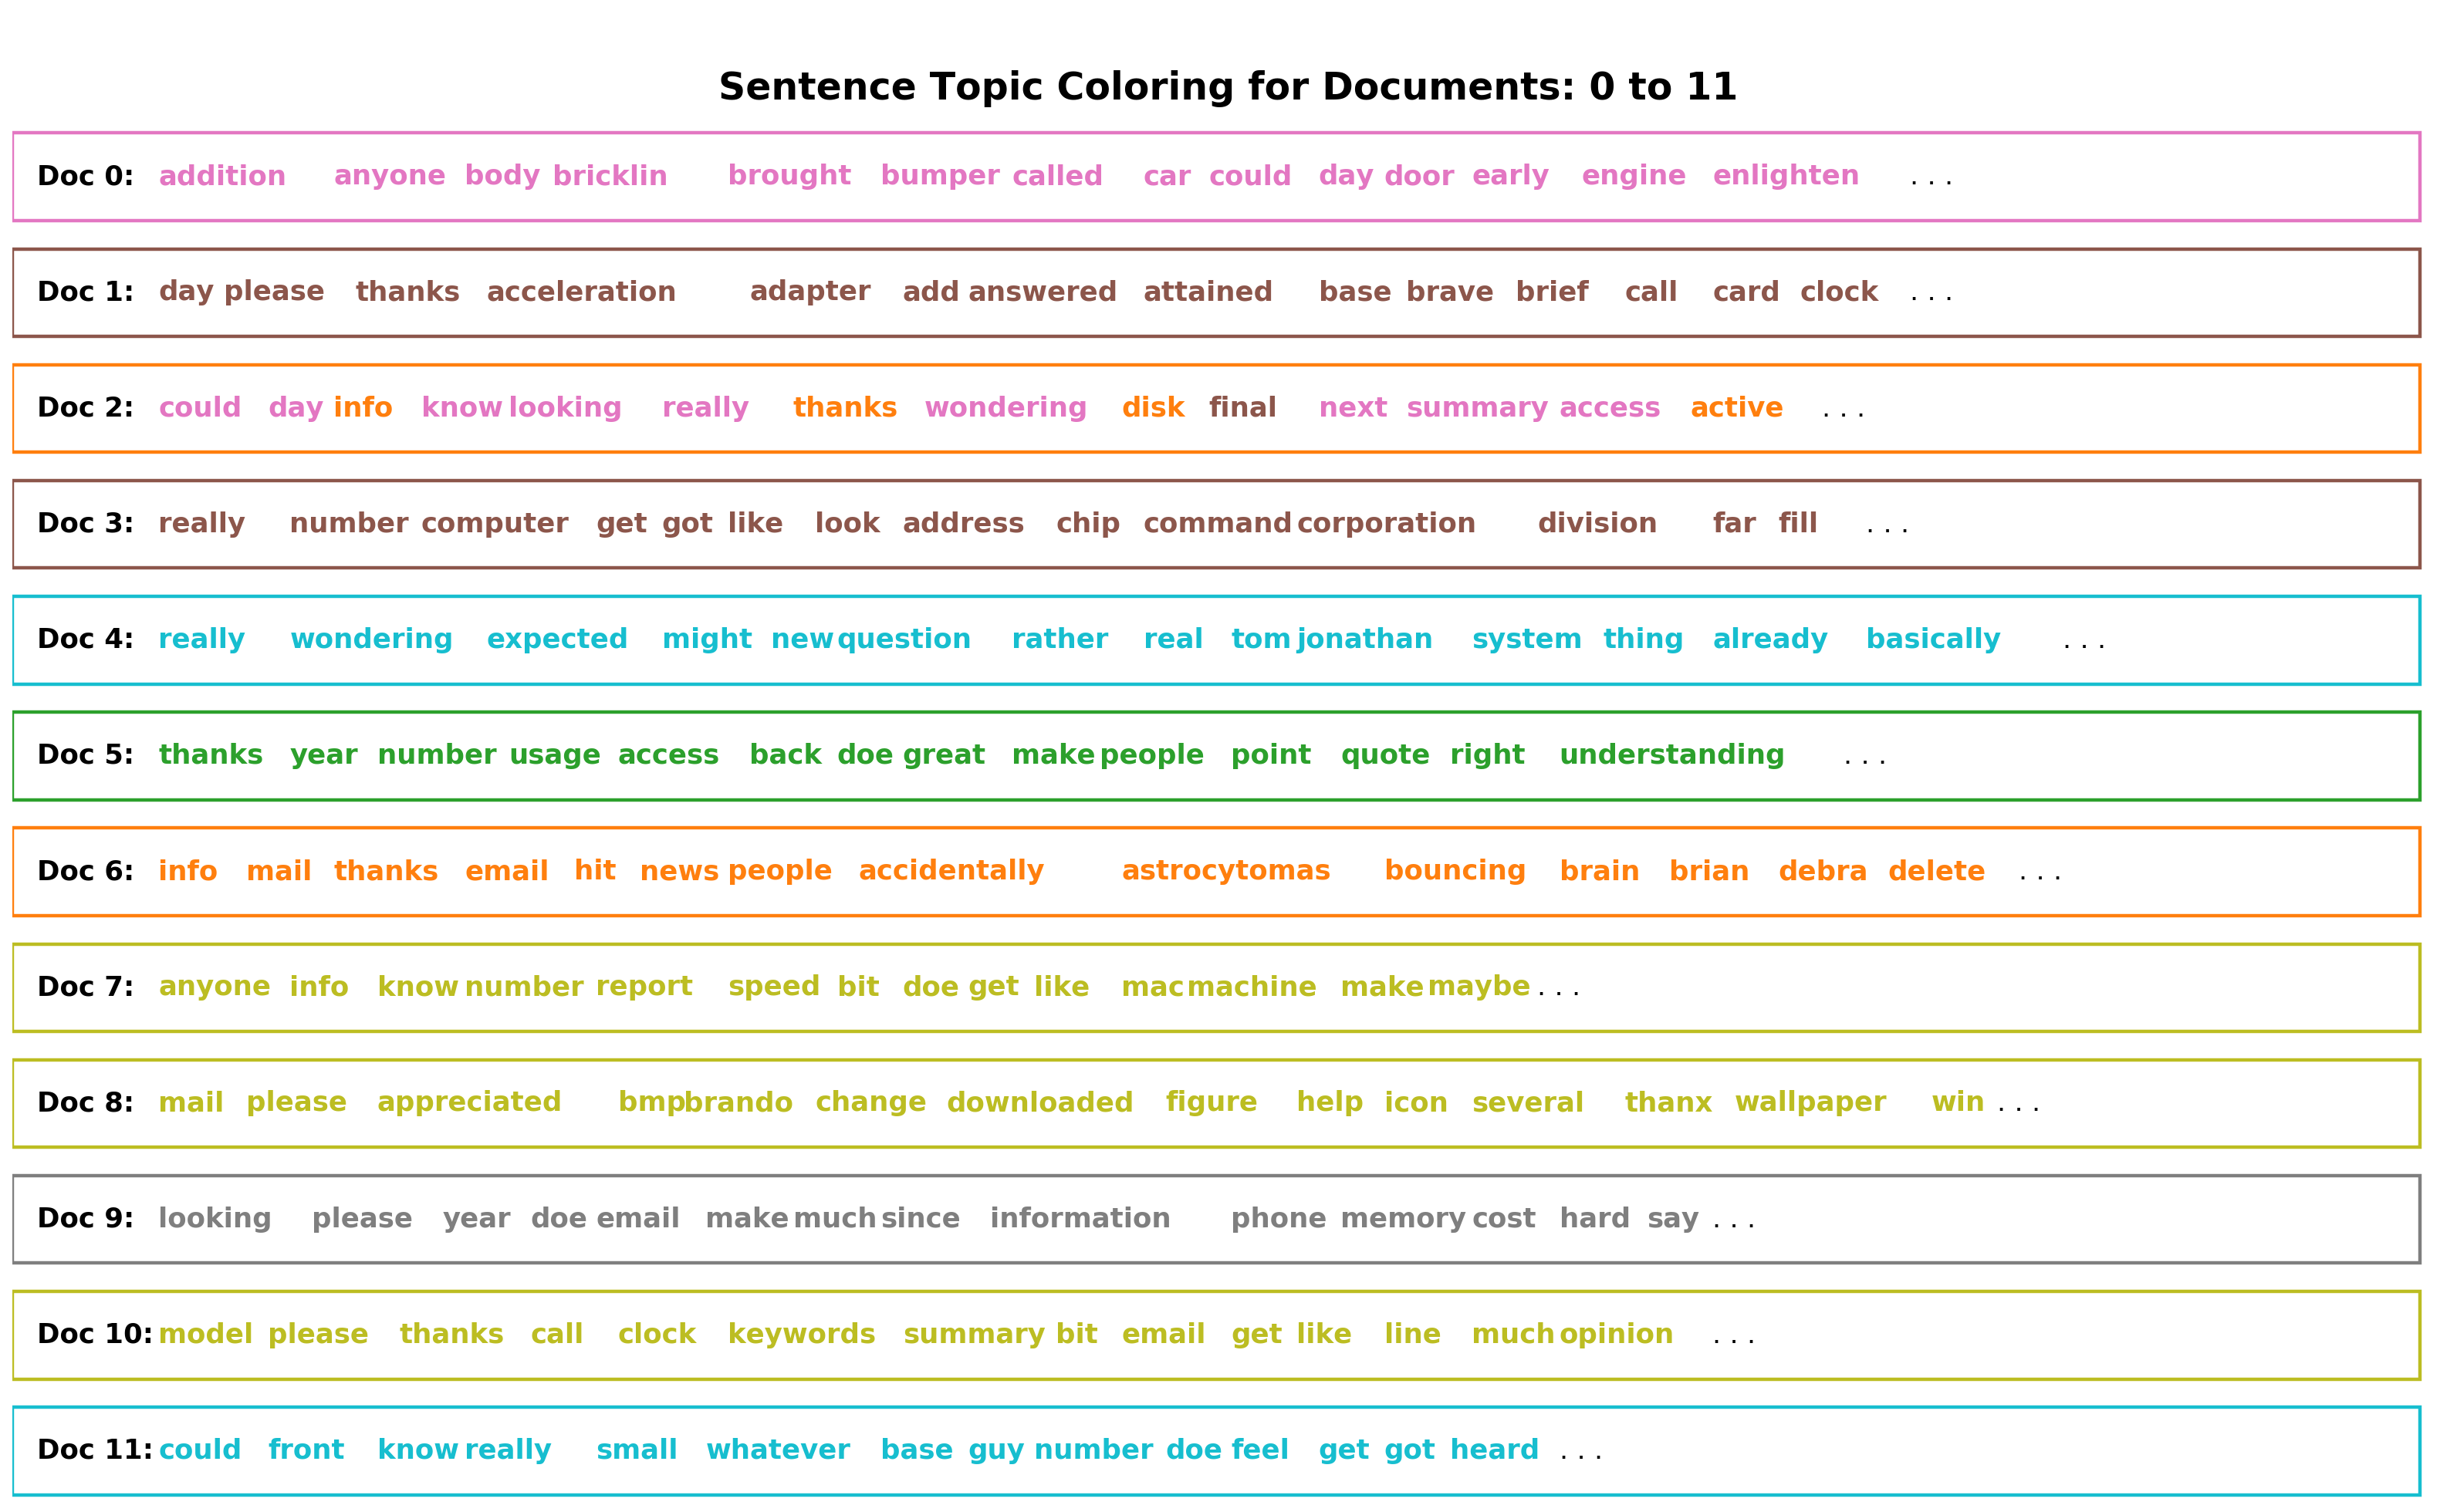

In [ ]:
# Sentence Chart Colored by Topic

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            print(word_dominanttopic)
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [ ]:
# t-SNE Clustering Chart

# Get topic weights and dominant topics
import pandas as pd
import numpy as np
from tomodapi import LdaModel
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

m = LdaModel()

m.train(TRAIN_CORPUS, preprocessing=False, num_topics=10)

topic_weights = []
for i, row_list in enumerate(m.get_corpus_predictions(topn=1)):
    topic_weights.append([w for w in row_list[0]])

arr = pd.DataFrame(topic_weights).fillna(0).values

arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 499 samples in 0.001s...
[t-SNE] Computed neighbors for 499 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 499 / 499
[t-SNE] Mean sigma: 0.055891


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.709003
[t-SNE] KL divergence after 1000 iterations: 0.073628
